# Confocal Scan

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import nipiezojenapy
import qt3utils.nidaq
import qt3utils.datagenerators as datasources
import qt3utils.datagenerators.piezoscanner
from argparse import Namespace
import matplotlib.pyplot as plt
import scipy.optimize

In [3]:
import qt3utils.nidaq.config

In [4]:
qt3utils.nidaq.config.reset_daq('Dev1')

In [5]:
logging.basicConfig(level = logging.INFO) #set to logging.WARNING to suppress logged information to cells

In [6]:
args = Namespace(daq_name='Dev1', 
                 signal_terminal='PFI0', 
                 clock_rate=100000, 
                 num_data_samples_per_batch=50, 
                 clock_terminal=None, 
                 rwtimeout=10, 
                 signal_counter='ctr2', 
                 piezo_write_channels='ao0,ao1,ao2', 
                 piezo_read_channels='ai0,ai1,ai2', 
                 randomtest=False, 
                 cmap='Greys_r')

In [7]:
controller = nipiezojenapy.PiezoControl(device_name = args.daq_name,
                                  write_channels = args.piezo_write_channels.split(','),
                                  read_channels = args.piezo_read_channels.split(','))

In [8]:
data_acq = datasources.NiDaqSampler(args.daq_name,
                             args.signal_terminal,
                             args.clock_rate,
                             args.num_data_samples_per_batch,
                             args.clock_terminal,
                             args.rwtimeout,
                             args.signal_counter)

In [9]:
scanner = datasources.NiDaqPiezoScanner(data_acq, controller)

In [10]:
scanner.set_scan_range(40, 60, 40, 60)

In [11]:
scanner.reset()

In [14]:
scanner.__dict__

{'running': False,
 'current_y': 0,
 'ymin': 40,
 'ymax': 60,
 'xmin': 40,
 'xmax': 60,
 'step_size': 0.5,
 'raster_line_pause': 0.15,
 'data': [],
 'controller': <nipiezojenapy.controller.PiezoControl at 0x2016b737400>,
 'num_daq_batches': 1,
 'nidaqsampler': <qt3utils.datagenerators.daqsamplers.NiDaqSampler at 0x2016b6b3190>}

In [15]:
scanner.controller.get_current_position()

[0.04567673118400789, 0.004451061808055372, -0.05223423357139445]

In [16]:
scanner.set_to_starting_position()

INFO:nipiezojenapy.controller:go to position x: 40.00 y: 40.00


In [20]:
scanner.controller.get_current_position()

[39.97804581427617, 40.04503830190768, 15.03121610872722]

In [18]:
some_optimal_z = 15 #use the qt3scope tool and the nipiezojenapy tool to find an optimal z
#OR, maybe can run a large optimize scan across all of z. see the optimize code below.
controller.go_to_position(z = some_optimal_z)

INFO:nipiezojenapy.controller:go to position z: 15.00


In [21]:
scanner.start()

In [22]:
while scanner.still_scanning():
            scanner.scan_x()
            scanner.move_y()

INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.00
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1045.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2090000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.07338127821954, 40.039885033536905, 15.000296805019943]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.50
INFO:nipiezojenapy.controller:go to position x: 40.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1134.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2268000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.079526547747726, 40.02700186267666, 15.018333065490511]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.50
INFO:nipiezojenapy.controller:go to position x: 46.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1212.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2424000.0
INFO:qt3utils.datagenerators.piezoscanner:current pos

INFO:qt3utils.datagenerators.piezoscanner:current position: [52.05477576985811, 40.07853454668946, 14.987413761870078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.50
INFO:nipiezojenapy.controller:go to position x: 52.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1366.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2732000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.62163990179982, 40.07080464399031, 15.036369326032048]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.00
INFO:nipiezojenapy.controller:go to position x: 53.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsampler

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1382.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2764000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [58.542808377583015, 40.03730839935724, 14.966800892905443]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.00
INFO:nipiezojenapy.controller:go to position x: 59.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1360.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count

INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1044.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2088000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.54642426348457, 40.61189791620871, 15.044099152000165]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.00
INFO:nipiezojenapy.controller:go to position x: 45.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1235.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2470000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.97157012259621, 40.57582502611586, 15.008026630927217]
INFO:qt3utils.datagenerators.piezoscanner:go to po

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.00
INFO:nipiezojenapy.controller:go to position x: 51.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1316.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2632000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.05761080800584, 40.54748204157394, 15.036369326032048]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.50
INFO:nipiezojenapy.controller:go to position x: 51.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1448.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2896000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.9736186940796, 40.537175501856325, 14.971954110137936]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.50
INFO:nipiezojenapy.controller:go to position x: 57.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1572.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 3144000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.517295021115444, 40.552635311455916, 14.9874

INFO:qt3utils.datagenerators.piezoscanner:current position: [43.03651322803085, 41.02158293558675, 15.013179848205969]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.50
INFO:nipiezojenapy.controller:go to position x: 43.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1345.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2690000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [43.58791402081817, 41.006123121748956, 15.000296805019943]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.00
INFO:nipiezojenapy.controller:go to position x: 44.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsample

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1108.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2216000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.52965659955873, 41.04734929229543, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.00
INFO:nipiezojenapy.controller:go to position x: 50.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1081.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count 

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2522000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.52295743959004, 41.01385302865028, 15.020909674134957]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.00
INFO:nipiezojenapy.controller:go to position x: 56.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1388.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2776000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.04344316584411, 41.03961938524182, 15.07759506467963]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.50
INFO:nipiezojenapy.controller:go to position x: 56.50
INFO:qt3utils.datagenerators.daqsampler

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.00
INFO:nipiezojenapy.controller:go to position x: 42.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1152.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2304000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.992974855753246, 41.503413870912986, 14.99514358775566]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.50
INFO:nipiezojenapy.controller:go to position x: 42.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1340.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2680000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.98624416386262, 41.562676508828055, 15.020909674134957]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.50
INFO:nipiezojenapy.controller:go to position x: 48.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1095.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2190000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.5402233946556, 41.50083723452932, 15.020909

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.50
INFO:nipiezojenapy.controller:go to position x: 54.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1186.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2372000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [54.515483202815076, 41.58071296426083, 14.989990370497159]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.00
INFO:nipiezojenapy.controller:go to position x: 55.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1048.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2096000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.483066169351204, 42.07027397176591, 15.013179848205969]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.00
INFO:nipiezojenapy.controller:go to position x: 41.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1083.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2382000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.556205722980145, 42.02647113891682, 15.041522543342674]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.00
INFO:nipiezojenapy.controller:go to position x: 47.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1225.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2450000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.99423536889478, 42.03420105051206, 15.008026630927217]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.50
INFO:nipiezojenapy.controller:go to position x: 47.50
INFO:qt3utils.datagenerators.daqsampl

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1035.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2070000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.07513138145171, 42.03420105051206, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.50
INFO:nipiezojenapy.controller:go to position x: 53.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch):

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2676000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.073602067738996, 42.09861698187289, 15.075018456003264]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.50
INFO:nipiezojenapy.controller:go to position x: 59.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1344.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2688000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.527095894394854, 42.04708423658412, 15.036369326032048]
INFO:nipiezojenapy.controller:go to position y: 42.50
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.piezoscanner:go to 

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.50
INFO:nipiezojenapy.controller:go to position x: 45.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1155.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2310000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [45.479168664559005, 42.57271831395874, 15.03121610872722]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.00
INFO:nipiezojenapy.controller:go to position x: 46.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1315.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2630000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.54975156311785, 42.54952857171188, 14.979683935997508]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.00
INFO:nipiezojenapy.controller:go to position x: 52.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1211.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2422000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.07023569754217, 42.528915467767746, 15.01060

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.00
INFO:nipiezojenapy.controller:go to position x: 58.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1511.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 3022000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.99913158996154, 42.55725848575772, 15.002873413654253]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.50
INFO:nipiezojenapy.controller:go to position x: 58.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1415.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2830000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.0568625079345, 43.093199282153165, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.50
INFO:nipiezojenapy.controller:go to position x: 44.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1385.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count 

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2490000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [50.04756331864362, 42.990133730677556, 15.049252369319495]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.50
INFO:nipiezojenapy.controller:go to position x: 50.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1245.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2490000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [50.56031692634004, 43.01332347918847, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.00
INFO:nipiezojenapy.controller:go to position x: 51.00
INFO:qt3utils.datagenerators.daqsampl

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1351.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2702000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.51497250133585, 42.96694398249794, 15.051828977981339]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.00
INFO:nipiezojenapy.controller:go to position x: 57.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch):

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1113.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2226000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [42.54179865770247, 43.569877543296684, 14.989990370497159]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.00
INFO:nipiezojenapy.controller:go to position x: 43.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1127.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2254000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [43.04681978317834, 43.54411114718969, 15.02863

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.00
INFO:nipiezojenapy.controller:go to position x: 49.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1086.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2172000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.07874294435655, 43.55699434519139, 15.064712021312326]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.50
INFO:nipiezojenapy.controller:go to position x: 49.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1256.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2512000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.0540051378932, 43.57760746220959, 14.977107327376206]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.50
INFO:nipiezojenapy.controller:go to position x: 55.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1242.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2484000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.55645403923518, 43.510614832869834, 15.049252

INFO:qt3utils.datagenerators.piezoscanner:current position: [41.0009698505009, 44.03624938471572, 15.036369326032048]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.50
INFO:nipiezojenapy.controller:go to position x: 41.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1022.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2044000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.53433350782521, 44.03109610395292, 15.041522543342674]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.00
INFO:nipiezojenapy.controller:go to position x: 42.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1271.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2542000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.5172944682764, 44.07747563142148, 14.997720196387078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.00
INFO:nipiezojenapy.controller:go to position x: 48.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1178.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count r

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2146000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.513163072578095, 44.03109610395292, 14.989990370497159]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.00
INFO:nipiezojenapy.controller:go to position x: 54.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1217.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2434000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [54.08775780800937, 44.0594391483557, 15.062135412643224]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.50
INFO:nipiezojenapy.controller:go to position x: 54.50
INFO:qt3utils.datagenerators.daqsample

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.00
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1087.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2174000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.050191570293705, 44.54384762226696, 15.000296805019943]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.50
INFO:nipiezojenapy.controller:go to position x: 40.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1035.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2070000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.12848278043018, 44.47685495209552, 14.99514358775566]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.50
INFO:nipiezojenapy.controller:go to position x: 46.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1176.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2352000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.54332250004284, 44.49746808107425, 15.0415225

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.50
INFO:nipiezojenapy.controller:go to position x: 52.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1045.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2090000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.495383778831496, 44.53611769863956, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.00
INFO:nipiezojenapy.controller:go to position x: 53.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1424.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2848000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [58.524771702947355, 44.52838777505028, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.00
INFO:nipiezojenapy.controller:go to position x: 59.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1344.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2688000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [58.978265319508466, 44.574767317157935, 14.959

INFO:qt3utils.datagenerators.piezoscanner:current position: [44.50519800451111, 45.06432923456616, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.00
INFO:nipiezojenapy.controller:go to position x: 45.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1282.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2564000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [45.023102961894466, 45.06432923456616, 15.038945934686636]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.50
INFO:nipiezojenapy.controller:go to position x: 45.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsample

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1164.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2328000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.039574239201606, 45.07978908710086, 15.033792717378908]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.50
INFO:nipiezojenapy.controller:go to position x: 51.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1086.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2812000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.007115332834445, 45.07978908710086, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.50
INFO:nipiezojenapy.controller:go to position x: 57.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1391.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2782000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.55594500620196, 45.02052631988889, 14.982260544620251]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.00
INFO:nipiezojenapy.controller:go to position x: 58.00
INFO:qt3utils.datagenerators.daqsampl

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.50
INFO:nipiezojenapy.controller:go to position x: 43.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1042.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2084000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [43.55184106597828, 45.57965773585817, 14.984837153244442]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.00
INFO:nipiezojenapy.controller:go to position x: 44.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1309.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2618000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.58376624784533, 45.548738020910754, 15.005450022290011]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.00
INFO:nipiezojenapy.controller:go to position x: 50.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1197.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2394000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.97026379618029, 45.512665020927095, 15.0260

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.00
INFO:nipiezojenapy.controller:go to position x: 56.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1282.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2564000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.99448657840981, 45.55646794958912, 15.03121610872722]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.50
INFO:nipiezojenapy.controller:go to position x: 56.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsam

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1053.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2106000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [42.093463707271944, 46.04087689148424, 15.044099152000165]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.50
INFO:nipiezojenapy.controller:go to position x: 42.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1094.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2262000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.01974057645484, 46.04603017892911, 14.966800892905443]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.50
INFO:nipiezojenapy.controller:go to position x: 48.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1372.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2744000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.50157367398623, 45.9996505925556, 14.979683935997508]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.00
INFO:nipiezojenapy.controller:go to position x: 49.00
INFO:qt3utils.datagenerators.daqsampler

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1279.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2558000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [54.53351981897674, 46.0872564791187, 15.000296805019943]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.00
INFO:nipiezojenapy.controller:go to position x: 55.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): 

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1063.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2126000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.54490540663875, 46.540745855468664, 14.969377501520968]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.00
INFO:nipiezojenapy.controller:go to position x: 41.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1008.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2016000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.01642966429187, 46.553629078383835, 15.0183

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.00
INFO:nipiezojenapy.controller:go to position x: 47.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1004.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2008000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.048344922326585, 46.566512301409674, 14.987413761870078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.50
INFO:nipiezojenapy.controller:go to position x: 47.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daq

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1164.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2328000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.00813831215708, 46.56393565679565, 15.018333065490511]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.50
INFO:nipiezojenapy.controller:go to position x: 53.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1224.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2448000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.55696624975156, 46.556205722980145, 15.03121

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.50
INFO:nipiezojenapy.controller:go to position x: 59.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1343.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2686000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.506482534849894, 46.54589914462145, 14.987413761870078]
INFO:nipiezojenapy.controller:go to position y: 47.00
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.00
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing 

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1183.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2366000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [45.53070152081285, 47.04576827688035, 15.000296805019943]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.00
INFO:nipiezojenapy.controller:go to position x: 46.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1141.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count 

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2284000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.54459825585879, 47.13337422456303, 15.018333065490511]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.00
INFO:nipiezojenapy.controller:go to position x: 52.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1078.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2156000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.01870260595433, 47.0431916314386, 15.046675760659106]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.50
INFO:nipiezojenapy.controller:go to position x: 52.50
INFO:qt3utils.datagenerators.daqsampler

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1409.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2818000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [58.00943825663393, 47.03546169514017, 14.961647675678723]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.50
INFO:nipiezojenapy.controller:go to position x: 58.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch):

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1155.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2310000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.0285194635778, 47.525024407096566, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.50
INFO:nipiezojenapy.controller:go to position x: 44.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1257.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2514000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.56446075212646, 47.55594416278394, 15.0827482

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.50
INFO:nipiezojenapy.controller:go to position x: 50.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1161.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2322000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [50.52424380201075, 47.527601053378994, 15.051828977981339]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.00
INFO:nipiezojenapy.controller:go to position x: 51.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1252.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2504000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.55619911842643, 47.568827394512475, 15.033792717378908]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.00
INFO:nipiezojenapy.controller:go to position x: 57.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1326.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2652000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.07668527778773, 47.522447760818665, 14.9848

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2102000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [42.53922201970744, 48.09188669850522, 15.02606289142819]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.00
INFO:nipiezojenapy.controller:go to position x: 43.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1040.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2080000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [42.99786364681105, 48.03262381227264, 15.02606289142819]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.50
INFO:nipiezojenapy.controller:go to position x: 43.50
INFO:qt3utils.datagenerators.daqsamplers

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1326.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2652000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.0581297521148, 48.04293040100906, 15.02606289142819]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.50
INFO:nipiezojenapy.controller:go to position x: 49.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2284000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.0411218353529, 48.02489387076827, 15.064712021312326]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.50
INFO:nipiezojenapy.controller:go to position x: 55.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1191.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2382000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.48430751802997, 47.9965507522704, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.00
INFO:nipiezojenapy.controller:go to position x: 56.00
INFO:qt3utils.datagenerators.daqsamplers:

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.50
INFO:nipiezojenapy.controller:go to position x: 41.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1016.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2032000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.58071296426083, 48.545376690823275, 15.020909674134957]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.00
INFO:nipiezojenapy.controller:go to position x: 42.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1217.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2434000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.48379806719207, 48.52218685821408, 14.987413761870078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.00
INFO:nipiezojenapy.controller:go to position x: 48.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1196.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2392000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.030047165099944, 48.55568328321399, 14.99772

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.00
INFO:nipiezojenapy.controller:go to position x: 54.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1159.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2318000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.98469146902576, 48.54795333891403, 14.989990370497159]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.50
INFO:nipiezojenapy.controller:go to position x: 54.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1247.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2494000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.04761493609879, 49.06843634819836, 15.028639500076979]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.50
INFO:nipiezojenapy.controller:go to position x: 40.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1566.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count 

INFO:qt3utils.datagenerators.piezoscanner:count rate: 1998000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.03572360405689, 49.0607064011287, 15.005450022290011]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.50
INFO:nipiezojenapy.controller:go to position x: 46.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1213.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2426000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.540745855468664, 49.04782315610585, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.00
INFO:nipiezojenapy.controller:go to position x: 47.00
INFO:qt3utils.datagenerators.daqsample

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1200.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2400000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.51599702257903, 49.02205666640977, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.00
INFO:nipiezojenapy.controller:go to position x: 53.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch):

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2586000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [58.51961836738718, 49.08904954058937, 14.987413761870078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.00
INFO:nipiezojenapy.controller:go to position x: 59.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1362.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2724000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.00660867628919, 49.052976454101, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.50
INFO:nipiezojenapy.controller:go to position x: 59.50
INFO:qt3utils.datagenerators.daqsamplers

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.00
INFO:nipiezojenapy.controller:go to position x: 45.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1187.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2374000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [45.00764310992524, 49.5683063481229, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.50
INFO:nipiezojenapy.controller:go to position x: 45.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsam

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1203.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2406000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.039574239201606, 49.49100685205374, 15.080171673357452]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.50
INFO:nipiezojenapy.controller:go to position x: 51.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1131.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2262000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.53686829500692, 49.51677335027275, 15.02090

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.50
INFO:nipiezojenapy.controller:go to position x: 57.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1187.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2374000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.48122170281014, 49.537386549186806, 14.977107327376206]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.00
INFO:nipiezojenapy.controller:go to position x: 58.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1026.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2052000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [43.50803819333574, 50.060446572803514, 14.99514358775566]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.00
INFO:nipiezojenapy.controller:go to position x: 44.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1137.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count 

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2068000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.49616015165991, 50.08363643059108, 15.005450022290011]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.00
INFO:nipiezojenapy.controller:go to position x: 50.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1075.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2150000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [50.042410017012955, 50.011490207628405, 15.049252369319495]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.50
INFO:nipiezojenapy.controller:go to position x: 50.50
INFO:qt3utils.datagenerators.daqsamp

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1196.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2392000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.040866503299675, 50.073329827082354, 15.02606289142819]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.50
INFO:nipiezojenapy.controller:go to position x: 56.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch)

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1277.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2554000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.992974855753246, 50.53455040886592, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.50
INFO:nipiezojenapy.controller:go to position x: 42.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1072.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2144000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [42.57271831395874, 50.54485701579792, 15.038945

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.50
INFO:nipiezojenapy.controller:go to position x: 48.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1174.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2348000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.55568328321399, 50.51651384691979, 14.979683935997508]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.00
INFO:nipiezojenapy.controller:go to position x: 49.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1224.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2448000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [54.6133962650306, 50.580930140665274, 14.969377501520968]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.00
INFO:nipiezojenapy.controller:go to position x: 55.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1208.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2416000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.046275156353325, 50.56804688167597, 15.05440

INFO:qt3utils.datagenerators.piezoscanner:current position: [40.519139057499004, 51.01123106013222, 15.044099152000165]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.00
INFO:nipiezojenapy.controller:go to position x: 41.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1236.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2472000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.980356765664794, 51.075647377047815, 15.000296805019943]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.50
INFO:nipiezojenapy.controller:go to position x: 41.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamp

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1257.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2514000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.08441795904358, 51.047304197231455, 14.987413761870078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.50
INFO:nipiezojenapy.controller:go to position x: 47.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1279.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2446000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.039058189869785, 50.99834779711277, 15.018333065490511]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.50
INFO:nipiezojenapy.controller:go to position x: 53.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1228.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2456000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.57500285254441, 51.03442093387262, 15.064712021312326]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.00
INFO:nipiezojenapy.controller:go to position x: 54.00
INFO:qt3utils.datagenerators.daqsampl

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1390.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2780000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.49875252511376, 50.98546453421449, 15.049252369319495]
INFO:nipiezojenapy.controller:go to position y: 51.50
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.00
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:retur

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1216.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2432000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [45.54616137802664, 51.57036479235007, 15.028639500076979]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.00
INFO:nipiezojenapy.controller:go to position x: 46.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1128.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2256000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.03572360405689, 51.53686829500692, 15.072441

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.00
INFO:nipiezojenapy.controller:go to position x: 52.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1105.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2210000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.034162533223004, 51.5677881386789, 14.951341241242597]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.50
INFO:nipiezojenapy.controller:go to position x: 52.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1270.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2540000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.996554923307215, 51.55748152404319, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.50
INFO:nipiezojenapy.controller:go to position x: 58.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1362.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2724000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [58.542808377583015, 51.562634831351254, 15.041

INFO:qt3utils.datagenerators.piezoscanner:current position: [44.062015788781096, 52.02385591502412, 15.064712021312326]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.50
INFO:nipiezojenapy.controller:go to position x: 44.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1060.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2120000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.5721906758937, 52.142382029090236, 15.005450022290011]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.00
INFO:nipiezojenapy.controller:go to position x: 45.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsample

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1131.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2262000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [50.537127060591715, 52.04189249692408, 15.005450022290011]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.00
INFO:nipiezojenapy.controller:go to position x: 51.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1075.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2306000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.53816247328017, 52.05735242445975, 15.018333065490511]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.00
INFO:nipiezojenapy.controller:go to position x: 57.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1153.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2306000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.01226866195484, 52.05735242445975, 14.966800892905443]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.50
INFO:nipiezojenapy.controller:go to position x: 57.50
INFO:qt3utils.datagenerators.daqsample

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.00
INFO:nipiezojenapy.controller:go to position x: 43.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1270.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2540000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [43.02620667294886, 52.544340233253315, 15.051828977981339]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.50
INFO:nipiezojenapy.controller:go to position x: 43.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1102.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2204000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.04782315610585, 52.54691688879911, 14.982260544620251]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.50
INFO:nipiezojenapy.controller:go to position x: 49.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1213.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2426000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.537386549186806, 52.54691688879911, 14.97195

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.50
INFO:nipiezojenapy.controller:go to position x: 55.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1134.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2268000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.543570731573844, 52.55980016660297, 15.051828977981339]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.00
INFO:nipiezojenapy.controller:go to position x: 56.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1061.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2122000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.487954052670176, 53.064824755184624, 15.002873413654253]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.00
INFO:nipiezojenapy.controller:go to position x: 42.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1214.   50.]
INFO:qt3utils.datagenerators.piezoscanner:coun

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2170000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.519871114545275, 53.100897947472426, 15.051828977981339]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.00
INFO:nipiezojenapy.controller:go to position x: 48.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1106.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2212000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.05066034260932, 53.05709478553725, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.50
INFO:nipiezojenapy.controller:go to position x: 48.50
INFO:qt3utils.datagenerators.daqsamp

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1155.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2310000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [54.04137795445036, 53.06997806830809, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.50
INFO:nipiezojenapy.controller:go to position x: 54.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): 

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1657.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 3314000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.06822800976489, 53.56984953743529, 15.038945934686636]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.50
INFO:nipiezojenapy.controller:go to position x: 40.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1436.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2872000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.58355493107201, 53.56211956480979, 15.033792

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.50
INFO:nipiezojenapy.controller:go to position x: 46.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1301.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2602000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.56393565679565, 53.55954290727812, 15.056982195309377]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.00
INFO:nipiezojenapy.controller:go to position x: 47.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1116.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2232000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.58041341134883, 53.56984953743529, 14.984837153244442]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.00
INFO:nipiezojenapy.controller:go to position x: 53.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1183.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2366000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.06740141174384, 53.58015616767388, 15.064712

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.00
INFO:nipiezojenapy.controller:go to position x: 59.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1236.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2472000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.05298871612004, 53.56727287988837, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.50
INFO:nipiezojenapy.controller:go to position x: 59.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsam

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1273.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2546000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [45.0179496778876, 54.00272807775514, 15.05440558664463]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.50
INFO:nipiezojenapy.controller:go to position x: 45.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1135.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count ra

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2292000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.03442093387262, 54.05426124693874, 15.005450022290011]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.50
INFO:nipiezojenapy.controller:go to position x: 51.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1204.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2408000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.565211485012625, 54.090334466589226, 15.033792717378908]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.00
INFO:nipiezojenapy.controller:go to position x: 52.00
INFO:qt3utils.datagenerators.daqsamp

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1217.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2434000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.525025018034405, 54.05426124693874, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.00
INFO:nipiezojenapy.controller:go to position x: 58.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch):

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1346.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2692000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [43.54668778678175, 54.54640311639047, 14.989990370497159]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.00
INFO:nipiezojenapy.controller:go to position x: 44.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1139.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2278000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.03109610395292, 54.51805986225121, 15.023486

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.00
INFO:nipiezojenapy.controller:go to position x: 50.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1183.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2366000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [50.03468006460263, 54.597936307341016, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.50
INFO:nipiezojenapy.controller:go to position x: 50.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1150.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2300000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.05374981607506, 54.53351981897674, 15.018333065490511]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.50
INFO:nipiezojenapy.controller:go to position x: 56.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1200.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2400000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.53300914614385, 54.55670975441471, 14.992566

INFO:qt3utils.datagenerators.piezoscanner:current position: [42.03935432492888, 55.03339185389145, 14.989990370497159]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.50
INFO:nipiezojenapy.controller:go to position x: 42.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1162.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2324000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [42.4773827090401, 54.98185864535046, 15.03121610872722]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.00
INFO:nipiezojenapy.controller:go to position x: 43.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1126.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2252000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.517033562129456, 55.04369849585049, 14.997720196387078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.00
INFO:nipiezojenapy.controller:go to position x: 49.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1231.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2252000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [54.469103333850015, 55.02566187247705, 14.997720196387078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.00
INFO:nipiezojenapy.controller:go to position x: 55.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1094.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2188000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.09523170690081, 55.056581798416936, 14.99514358775566]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.50
INFO:nipiezojenapy.controller:go to position x: 55.50
INFO:qt3utils.datagenerators.daqsampl

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.00
INFO:nipiezojenapy.controller:go to position x: 41.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1639.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 3278000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.0009698505009, 55.600257286270605, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.50
INFO:nipiezojenapy.controller:go to position x: 41.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsam

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1162.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2324000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.01227188648634, 55.584797316554486, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.50
INFO:nipiezojenapy.controller:go to position x: 47.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1157.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2314000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.56109745546179, 55.53841740854625, 15.020909

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.50
INFO:nipiezojenapy.controller:go to position x: 53.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1228.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2456000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.54150630469896, 55.587373978160635, 14.956494458457776]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.00
INFO:nipiezojenapy.controller:go to position x: 54.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1219.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2438000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.52967256436341, 55.50749747082367, 14.979683935997508]
INFO:nipiezojenapy.controller:go to position y: 56.00
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.00
INFO:nipiezojenapy.controller:go to position x: 40.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1510.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 3020000.0


INFO:qt3utils.datagenerators.piezoscanner:current position: [45.471438736270194, 56.040866503299675, 15.000296805019943]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.00
INFO:nipiezojenapy.controller:go to position x: 46.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1092.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2184000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.06149004136879, 56.00221656577177, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 46.50
INFO:nipiezojenapy.controller:go to position x: 46.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsampl

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1219.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2438000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.04189249692408, 55.99963990331246, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.50
INFO:nipiezojenapy.controller:go to position x: 52.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1191.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count r

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2624000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [58.01459159000318, 56.03313651569832, 15.013179848205969]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.50
INFO:nipiezojenapy.controller:go to position x: 58.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1219.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2438000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [58.51704169961542, 56.10012974316866, 15.005450022290011]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.00
INFO:nipiezojenapy.controller:go to position x: 59.00
INFO:qt3utils.datagenerators.daqsample

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.50
INFO:nipiezojenapy.controller:go to position x: 44.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1201.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2402000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.5490009047064, 56.612885719171295, 15.02348628278085]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.00
INFO:nipiezojenapy.controller:go to position x: 45.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsam

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1208.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2416000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [50.598966703452206, 56.50208918377685, 15.018333065490511]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.00
INFO:nipiezojenapy.controller:go to position x: 51.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1182.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2364000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.05761080800584, 56.62576903788521, 15.00545

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.00
INFO:nipiezojenapy.controller:go to position x: 57.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1168.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2336000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.00969199739194, 56.63092236540843, 15.056982195309377]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.50
INFO:nipiezojenapy.controller:go to position x: 57.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1213.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2426000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [42.97467389852101, 57.08183860720066, 15.02606289142819]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.50
INFO:nipiezojenapy.controller:go to position x: 43.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1190.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count r

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2298000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.045246507115266, 57.050918631048276, 15.033792717378908]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.50
INFO:nipiezojenapy.controller:go to position x: 49.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1078.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2156000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.480700252897854, 57.0303053140468, 15.046675760659106]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.00
INFO:nipiezojenapy.controller:go to position x: 50.00
INFO:qt3utils.datagenerators.daqsamp

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1148.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2296000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.51780411664682, 57.050918631048276, 15.044099152000165]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.00
INFO:nipiezojenapy.controller:go to position x: 56.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch)

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1487.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2974000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.547216690039924, 57.5353316806695, 15.036369326032048]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.00
INFO:nipiezojenapy.controller:go to position x: 42.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1304.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2608000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.99555149289569, 57.5945949925182, 15.0157564

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.00
INFO:nipiezojenapy.controller:go to position x: 48.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1078.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2156000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.03262381227264, 57.58686499515654, 15.028639500076979]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.50
INFO:nipiezojenapy.controller:go to position x: 48.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1154.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2308000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [54.046531271430304, 57.58686499515654, 15.07759506467963]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.50
INFO:nipiezojenapy.controller:go to position x: 54.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1171.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2342000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [54.554133094900884, 57.53790834634193, 15.01833

INFO:qt3utils.datagenerators.piezoscanner:current position: [40.04503830190768, 58.05066492420496, 15.062135412643224]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 40.50
INFO:nipiezojenapy.controller:go to position x: 40.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1538.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 3076000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [40.53459886693656, 58.05324159097499, 15.010603239565869]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.00
INFO:nipiezojenapy.controller:go to position x: 41.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsampler

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1135.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2270000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [46.49436625388983, 58.076431592153384, 14.971954110137936]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.00
INFO:nipiezojenapy.controller:go to position x: 47.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1154.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2526000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [52.57268344453166, 58.05066492420496, 14.977107327376206]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.00
INFO:nipiezojenapy.controller:go to position x: 53.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1192.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2384000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.028751563884946, 58.076431592153384, 15.033792717378908]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 53.50
INFO:nipiezojenapy.controller:go to position x: 53.50
INFO:qt3utils.datagenerators.daqsamp

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1148.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2296000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.06587206083982, 58.02232159009836, 14.992566979125687]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 59.50
INFO:nipiezojenapy.controller:go to position x: 59.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch):

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1217.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2434000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [45.05917595042222, 58.524771702947355, 15.02606289142819]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 45.50
INFO:nipiezojenapy.controller:go to position x: 45.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1103.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2206000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [45.55131466379921, 58.56342172035731, 14.979683

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 51.50
INFO:nipiezojenapy.controller:go to position x: 51.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1212.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2424000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [51.55490487039651, 58.576305059771954, 15.008026630927217]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 52.00
INFO:nipiezojenapy.controller:go to position x: 52.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqs

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1307.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2614000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.53017834934103, 58.55569171677525, 14.989990370497159]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 58.00
INFO:nipiezojenapy.controller:go to position x: 58.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1197.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2394000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [57.98882492337727, 58.56857505610649, 15.013179

INFO:qt3utils.datagenerators.piezoscanner:current position: [43.53122794929154, 59.04268204044512, 14.969377501520968]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.00
INFO:nipiezojenapy.controller:go to position x: 44.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1169.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2338000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.03624938471572, 59.05556538505277, 15.015756456847516]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.50
INFO:nipiezojenapy.controller:go to position x: 44.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsampler

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1163.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2326000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [50.081059779706756, 58.98341865705455, 14.99514358775566]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 50.50
INFO:nipiezojenapy.controller:go to position x: 50.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1194.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count 

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2154000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.06663312898354, 59.03752870264131, 14.974530718756348]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 56.50
INFO:nipiezojenapy.controller:go to position x: 56.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1048.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2096000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [56.4814758759615, 59.06587206083982, 15.008026630927217]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 57.00
INFO:nipiezojenapy.controller:go to position x: 57.00
INFO:qt3utils.datagenerators.daqsampler

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 42.50
INFO:nipiezojenapy.controller:go to position x: 42.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1381.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2762000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [42.575294952006416, 59.521942554474705, 15.038945934686636]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 43.00
INFO:nipiezojenapy.controller:go to position x: 43.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daq

INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1145.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2290000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [48.475807194116335, 59.58378263500892, 14.982260544620251]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 49.00
INFO:nipiezojenapy.controller:go to position x: 49.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1206.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2412000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [49.01690336852648, 59.50390586493221, 15.01317

INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.00
INFO:nipiezojenapy.controller:go to position x: 55.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1113.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2226000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [55.05142847737467, 59.51421254463688, 15.005450022290011]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 55.50
INFO:nipiezojenapy.controller:go to position x: 55.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsa

INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1288.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2576000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [41.0550791993842, 60.0295466454638, 14.987413761870078]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 41.50
INFO:nipiezojenapy.controller:go to position x: 41.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1440.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count ra

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2214000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.00454195034886, 60.08108006805239, 15.041522543342674]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.50
INFO:nipiezojenapy.controller:go to position x: 47.50
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1148.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2296000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.5327543459574, 60.08365673924169, 15.02606289142819]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 48.00
INFO:nipiezojenapy.controller:go to position x: 48.00
INFO:qt3utils.datagenerators.daqsamplers

INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1137.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2274000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [53.53635298972213, 60.00120326401189, 15.002873413654253]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 54.00
INFO:nipiezojenapy.controller:go to position x: 54.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch):

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2606000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [59.52967256436341, 59.97801322515485, 15.051828977981339]


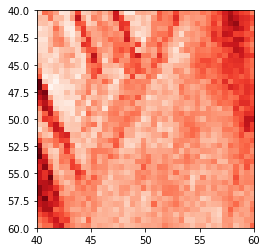

In [28]:
plt.imshow(scanner.data, cmap='Reds', extent = [40, 60, 60, 40])

In [51]:
scanner.stop()

In [30]:
#perform some computational magic to locate a position of interest.
#for example, perform a convolution of the image with a mask that
#represents your interest (for example, a single NV center that is 
#significantly isolated from other NV centers in the sample
#https://en.wikipedia.org/wiki/Kernel_(image_processing)

#x_opt, y_opt = find_best_nv_center(scanner.data)
x_opt = 46
y_opt = 43
controller.go_to_position(x_opt, y_opt)

INFO:nipiezojenapy.controller:go to position x: 46.00 y: 43.00


In [32]:
data, scanvals, x_opt, fit_coef = scanner.optimize_position('x', x_opt, width = 2, step_size = 0.25)
controller.go_to_position(x = x_opt)

data, scanvals, y_opt, fit_coef = scanner.optimize_position('y', y_opt)
controller.go_to_position(y = y_opt)

data, scanvals, z_opt, fit_coef = scanner.optimize_position('z', controler.get_current_position()[2], width = 10)
controller.go_to_position(z = z_opt)

data, scanvals, x_opt, fit_coef = scanner.optimize_position('x', x_opt)
controller.go_to_position(x = x_opt)

data, scanvals, y_opt, fit_coef = scanner.optimize_position('y', y_opt)
controller.go_to_position(y = y_opt)

INFO:nipiezojenapy.controller:go to position x: 44.00
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.00
INFO:nipiezojenapy.controller:go to position x: 44.00
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1400.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2800000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [43.98986985845344, 43.05454969958197, 14.99514358775566]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 44.25
INFO:nipiezojenapy.controller:go to position x: 44.25
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsam

INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1159.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2318000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [47.040614986001316, 43.02620667294886, 15.000296805019943]
INFO:qt3utils.datagenerators.piezoscanner:go to position x: 47.25
INFO:nipiezojenapy.controller:go to position x: 47.25
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1249.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2498000.0
INFO:qt3utils.datagenerators.piezoscanner:current pos

INFO:qt3utils.datagenerators.piezoscanner:count rate: 2966000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.38151923408866, 43.0700095324998, 14.982260544620251]
INFO:qt3utils.datagenerators.piezoscanner:go to position y: 43.25
INFO:nipiezojenapy.controller:go to position y: 43.25
INFO:qt3utils.datagenerators.daqsamplers:starting counter task
INFO:qt3utils.datagenerators.daqsamplers:pausing for 0.000525 seconds
INFO:qt3utils.datagenerators.daqsamplers:reading data
INFO:qt3utils.datagenerators.daqsamplers:returned 50 samples
INFO:qt3utils.datagenerators.daqsamplers:batch data (sum counts, num clock cycles per batch): [1462.   50.]
INFO:qt3utils.datagenerators.piezoscanner:count rate: 2924000.0
INFO:qt3utils.datagenerators.piezoscanner:current position: [44.37894259314171, 43.30963696162153, 14.979683935997508]
INFO:qt3utils.datagenerators.piezoscanner:go to position y: 43.50
INFO:nipiezojenapy.controller:go to position y: 43.50
INFO:qt3utils.datagenerators.daqsampler

NameError: name 'controler' is not defined

In [33]:
controller.get_current_position()

[44.38667251599523, 43.42043245163783, 15.049252369319495]

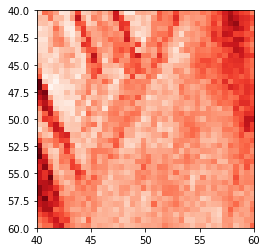

In [34]:
plt.imshow(scanner.data, cmap='Reds', extent = [40, 60, 60, 40])

In [47]:
scan_data = {'ymin':scanner.ymin, 'ymax':scanner.ymax, 'xmin':scanner.xmin, 'xmax':scanner.xmax,
            'data':scanner.data}

In [48]:
import pickle 
myfilename = 'ppm_sample_oct4_2022_1mW.pickle'
with open(myfilename, 'wb') as handle:
    pickle.dump(scan_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
with open(myfilename, 'rb') as handle:
    loaded_scan_data = pickle.load(handle)

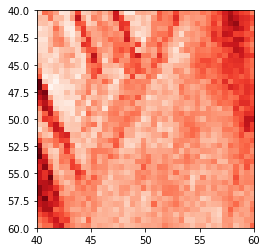

In [50]:
xmin = loaded_scan_data['xmin']
xmax = loaded_scan_data['xmax']
ymin = loaded_scan_data['ymin']
ymax = loaded_scan_data['ymax']

plt.imshow(loaded_scan_data['data'], cmap='Reds', extent = [xmin, xmax, ymax, ymin])